<a href="https://colab.research.google.com/github/Promila-uwc/data-science-projects/blob/main/MMPI_2FINAL__Basic_Text_Generation_Using_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import string
import nltk
from nltk.corpus import stopwords


# **Data loading**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Variational auto encoder/MMPI-2 Alternatives - Dataset v.1 (1).csv') 
df.head()

,MMPI-2 Prompt,1 Sigma Alternative,2 Sigma Alternative 1,2 Sigma Alternative 2,3 Sigma Alternative 1,3 Sigma Alternative 2
0,1. I like mechanics magazines.,I enjoy mechanics magazines,I am neutral to mechanics magazines,I am okay with mechanics magazines,I hate mechanics magazines,I despise mechanics magazines
1,2. I have a good appetite.,I eat well,I eat a medium amount,My appetite is medium,I have a bad appetite,I don't eat any food
2,3. I wake up fresh and rested most mornings.,I have a relaxing sleep every night.,I feel somewhat well-rested when I wake up,I feel moderately rested after a night's sleep,I wake up still tired most mornings,Sleep does not refresh me or make me feel rested
3,4. I think I would enjoy the work of a librarian.,I would like to be a librarian,I would be okay with being a librarian,The work of a librarian would be acceptable to me,I think I would hate the work of a librarian,I wouldn't like to be a librarian.
4,5. I am easily awakened by noise.,Loud sounds break up my sleep very easily,I am awakened by loud sounds occassionally,Noise awakes me with moderate ease,Noise never awakens me,I can sleep through any loud sounds


In [ ]:
df1 = df["MMPI-2 Prompt"]
df2=df["1 Sigma Alternative "]
df3=df["2 Sigma Alternative 1"]
df4=df["3 Sigma Alternative 1"]
df5=df["3 Sigma Alternative 2"]

In [ ]:
frames  = [df1,df2,df3,df4,df5]
df = pd.concat(frames)

In [ ]:
df.head()

0                       1. I like mechanics magazines.
1                           2. I have a good appetite.
2         3. I wake up fresh and rested most mornings.
3    4. I think I would enjoy the work of a librarian.
4                    5. I am easily awakened by noise.
dtype: object

In [ ]:
df.shape

(2845,)

In [ ]:
df.tail()

564    NaN
565    NaN
566    NaN
567    NaN
568    NaN
dtype: object

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(1408,)

In [ ]:
df.tail()

205    I never feel that I can make up my mind with u...
206             I would hate to belong to several clubs.
207    I frequently notice my heart pounding and I am...
208                          I dislike talking about sex
209                    I dislike traveling to new places
dtype: object

In [ ]:
# # iterating the columns
# for col in df.columns:
#     print(col)

# **Data preprocessing**

In [ ]:
# df['ColumnA'] = df[df.columns[1:]].apply(
#     lambda x: ','.join(x.dropna().astype(str)),
#     axis=1
# )
# df

In [ ]:
df['ColumnA']=df

In [ ]:
df.shape

(1409,)

In [ ]:
# remove numeric digits
df["ColumnA"]= df["ColumnA"].str.replace('\d+', '')

<ipython-input-44-b7ca9ea9f5c2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["ColumnA"]= df["ColumnA"].str.replace('\d+', '')


In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["ColumnA"]=df["ColumnA"].fillna("")


In [ ]:
# remove stopwords


nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df["ColumnA"]= df["ColumnA"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])).fillna("")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# remove punctuations
df["ColumnA"] = df["ColumnA"].str.replace('[{}]'.format(string.punctuation), '')

<ipython-input-48-993981f1810a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["ColumnA"] = df["ColumnA"].str.replace('[{}]'.format(string.punctuation), '')


In [ ]:
df["ColumnA"].head()

0               I like mechanics magazines
1                          I good appetite
2             I wake fresh rested mornings
3     I think I would enjoy work librarian
4                  I easily awakened noise
dtype: object

In [ ]:
df["ColumnA"].tail()

206                        I would hate belong several clubs
207        I frequently notice heart pounding I usually s...
208                                    I dislike talking sex
209                           I dislike traveling new places
ColumnA                                                     
dtype: object

In [ ]:
df.shape

(1409,)

In [ ]:
df["ColumnA"][1]

1        I good appetite
1             I eat well
1    I eat medium amount
1         I bad appetite
1             I eat food
dtype: object

In [ ]:
type(df["ColumnA"][1])

pandas.core.series.Series

In [ ]:
# convert to lower
df["ColumnA"]=df["ColumnA"].str.lower()

In [ ]:
prompt = df["ColumnA"]

In [ ]:
prompt = df["ColumnA"].astype(str)

In [ ]:
prompt.head()

0               i like mechanics magazines
1                          i good appetite
2             i wake fresh rested mornings
3     i think i would enjoy work librarian
4                  i easily awakened noise
dtype: object

## **Text Tokenization**

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(prompt)

In [ ]:
total_words = len(tokenizer.word_index) + 1

In [ ]:
print(total_words)

1467


In [ ]:
prompt.head()

0               i like mechanics magazines
1                          i good appetite
2             i wake fresh rested mornings
3     i think i would enjoy work librarian
4                  i easily awakened noise
dtype: object

In [ ]:
# create input sequences using list of tokens
input_sequences = []
for line in prompt:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

# **Model Creation**

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.9.2


In [ ]:
checkpoint_path = "/content/drive/MyDrive/Variational auto encoder"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 100)           146700    
                                                                 
 bidirectional (Bidirectiona  (None, 19, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 733)               74033     
                                                                 
 dense_1 (Dense)             (None, 1467)              1076778   
                                                        

# **Simulation**

In [ ]:
history = model.fit(predictors, label, batch_size=32,epochs=100, verbose=1,callbacks=[cp_callback])

Epoch 1/100
209/209 [==============================] - ETA: 0s - loss: 6.9582 - accuracy: 0.0610
Epoch 1: saving model to /content/drive/MyDrive/Variational auto encoder
209/209 [==============================] - 48s 197ms/step - loss: 6.9582 - accuracy: 0.0610
Epoch 2/100
209/209 [==============================] - ETA: 0s - loss: 6.2923 - accuracy: 0.0636
Epoch 2: saving model to /content/drive/MyDrive/Variational auto encoder
209/209 [==============================] - 26s 123ms/step - loss: 6.2923 - accuracy: 0.0636
Epoch 3/100
209/209 [==============================] - ETA: 0s - loss: 6.1411 - accuracy: 0.0636
Epoch 3: saving model to /content/drive/MyDrive/Variational auto encoder
209/209 [==============================] - 25s 121ms/step - loss: 6.1411 - accuracy: 0.0636
Epoch 4/100
209/209 [==============================] - ETA: 0s - loss: 6.0429 - accuracy: 0.0636
Epoch 4: saving model to /content/drive/MyDrive/Variational auto encoder
209/209 [==============================] - 2

In [ ]:
os.listdir(checkpoint_dir)

['More for the Axa.gdoc',
 'more about text docs.gdoc',
 'xdi-tcni-vfc – 25 Jul 2022 (1).gjam',
 'xdi-tcni-vfc – 25 Jul 2022.gjam',
 'Untitled document (5).gdoc',
 'workflow_Promila.gdoc',
 'UWC apps report.gdoc',
 'Untitled document (4).gdoc',
 'Untitled document (3).gdoc',
 'Ncif7Z-NICHQ-Vanderbilt-Assessment-Scales.pdf',
 'Untitled document (2).gdoc',
 'Untitled document (1).gdoc',
 'Untitled document.gdoc',
 'New paid packages issues.gdoc',
 'Dashborad API draft.gdoc',
 'Old template field copy function draft.gdoc',
 'Promila_Ghosh.pdf',
 'Ncif7Z-NICHQ-Vanderbilt-Assessment-Scales.gdoc',
 'Worksheet and course status flow.gdoc',
 'promila_ghosh.jpg',
 'Screenshot from 2022-10-19 18-00-40.png',
 'Experts Issues Tracker.gsheet',
 'Worksheet upload photos.gdoc',
 'FastAPI worksheet.gsheet',
 'App Issues Tracker.gsheet',
 'Project Wireframes.gslides',
 'Demo_MMPI.gsheet',
 'neraaj.mp4',
 'Colab Notebooks',
 'MMPI-2 Alternatives dataset - Dataset v.2.csv',
 'MMPI-2 Alternatives dataset.

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'/content/drive/MyDrive/Variational auto encoder'

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('/content/drive/MyDrive/Variational auto encoder/mmpi_2_alter_with_vae') 

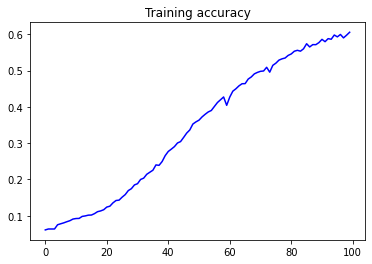

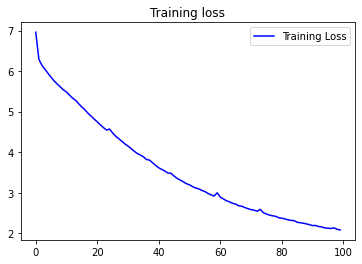

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# **Test the model**

In [ ]:
#predicting the next word using an initial sentence
input_phrase = "I wake up fresh and rested most "
next_words = 1
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([input_phrase])[0] #converting our input_phrase to tokens and excluding the out of vcabulary words
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') #padding the input_phrase
	predicted =  np.argmax(model.predict(token_list),axis=1) #predicting the token of the next word using our trained model
	output_word = "" #initialising output word as blank at the beginning
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word #converting the token back to the corresponding word and storing it in the output_word
			break
	input_phrase += " " + output_word
print(input_phrase)

1/1 [==============================] - 4s 4s/step
I wake up fresh and rested most  people


In [ ]:
#predicting the next word using an initial sentence
input_phrase = "I have a relaxing "
next_words = 1
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([input_phrase])[0] #converting our input_phrase to tokens and excluding the out of vcabulary words
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') #padding the input_phrase
	predicted =  np.argmax(model.predict(token_list),axis=1) #predicting the token of the next word using our trained model
	output_word = "" #initialising output word as blank at the beginning
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word #converting the token back to the corresponding word and storing it in the output_word
			break
	input_phrase += " " + output_word
print(input_phrase)

1/1 [==============================] - 0s 25ms/step
I have a relaxing  pull


In [ ]:
#predicting the next word using an initial sentence
input_phrase = "I feel somewhat "
next_words = 1
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([input_phrase])[0] #converting our input_phrase to tokens and excluding the out of vcabulary words
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') #padding the input_phrase
	predicted =  np.argmax(model.predict(token_list),axis=1) #predicting the token of the next word using our trained model
	output_word = "" #initialising output word as blank at the beginning
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word #converting the token back to the corresponding word and storing it in the output_word
			break
	input_phrase += " " + output_word
print(input_phrase)

1/1 [==============================] - 0s 30ms/step
I feel somewhat  wellrested


In [ ]:
#predicting the next word using an initial sentence
input_phrase = "I feel moderately rested after a night's "
next_words = 1
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([input_phrase])[0] #converting our input_phrase to tokens and excluding the out of vcabulary words
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') #padding the input_phrase
	predicted =  np.argmax(model.predict(token_list),axis=1) #predicting the token of the next word using our trained model
	output_word = "" #initialising output word as blank at the beginning
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word #converting the token back to the corresponding word and storing it in the output_word
			break
	input_phrase += " " + output_word
print(input_phrase)

1/1 [==============================] - 0s 23ms/step
I feel moderately rested after a night's  start


In [ ]:
#predicting the next word using an initial sentence
input_phrase = "I wake up still tired most "
next_words = 1
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([input_phrase])[0] #converting our input_phrase to tokens and excluding the out of vcabulary words
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') #padding the input_phrase
	predicted =  np.argmax(model.predict(token_list),axis=1) #predicting the token of the next word using our trained model
	output_word = "" #initialising output word as blank at the beginning
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word #converting the token back to the corresponding word and storing it in the output_word
			break
	input_phrase += " " + output_word
print(input_phrase)

1/1 [==============================] - 0s 24ms/step
I wake up still tired most  people


In [ ]:
#predicting the next word using an initial sentence
input_phrase = "Sleep does not refresh me or make me feel "
next_words = 1
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([input_phrase])[0] #converting our input_phrase to tokens and excluding the out of vcabulary words
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') #padding the input_phrase
	predicted =  np.argmax(model.predict(token_list),axis=1) #predicting the token of the next word using our trained model
	output_word = "" #initialising output word as blank at the beginning
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word #converting the token back to the corresponding word and storing it in the output_word
			break
	input_phrase += " " + output_word
print(input_phrase)

1/1 [==============================] - 0s 29ms/step
Sleep does not refresh me or make me feel  i
